#### [Data set here :](https://drive.google.com/file/d/1ZXPe9-ajod-U9Mzj3xePGCwnAQ2bG1D_/view?usp=sharing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.datasets import make_regression


In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.head(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
X =  df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [9]:
y_pred = rf_regressor.predict(X_test)

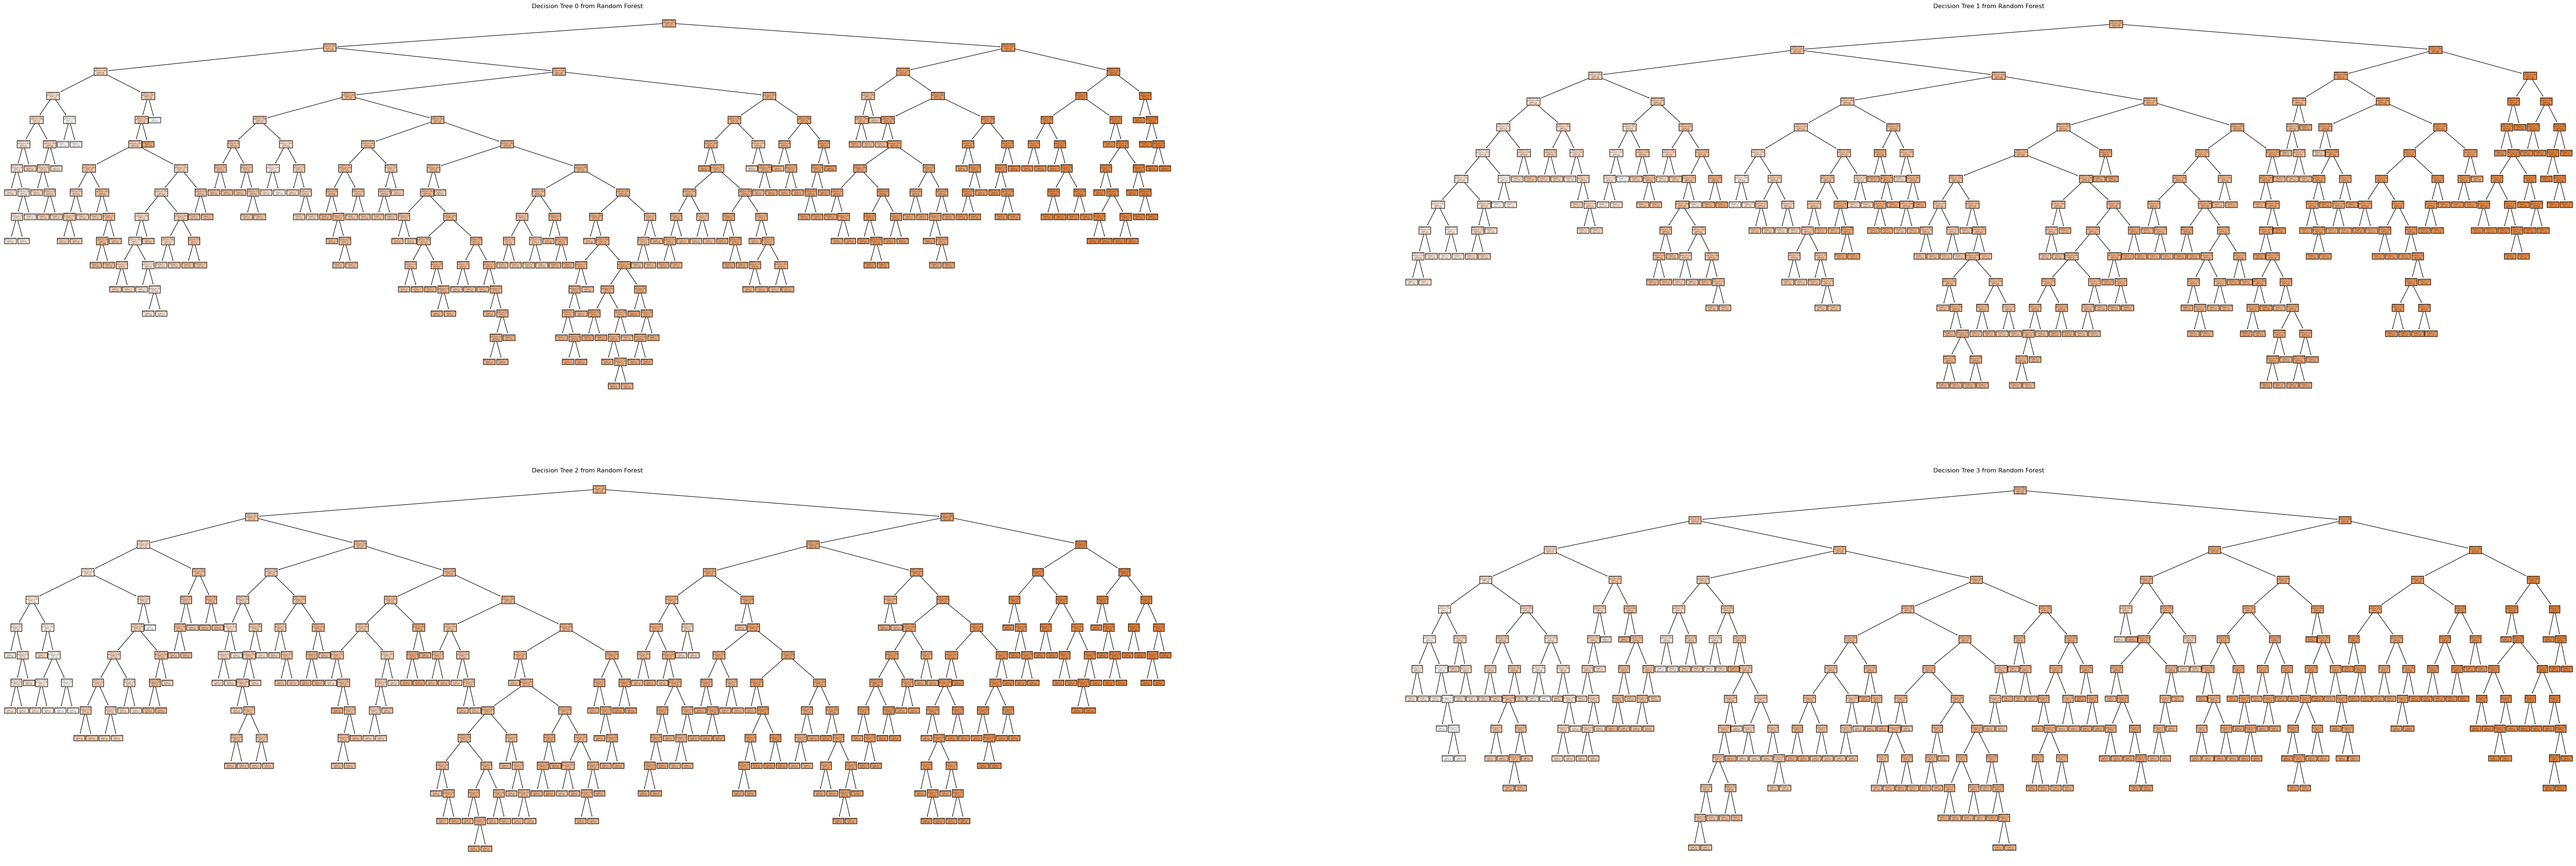

In [10]:
# Visualize the decision trees in the Random Forest
_, axes= plt.subplots(2,2, figsize=(90,30))
for i in range(4):
    plot_tree(rf_regressor.estimators_[i], filled=True, feature_names=[f'Feature {i}' for i in range(X.shape[1])], ax= axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Decision Tree {i} from Random Forest")

In [11]:
for i in range(4):
    dt= rf_regressor.estimators_[i]
    print(f"Decision Tree no. {i}:", " "*5, "|", dt.predict([X_test.iloc[33]])[0])

print('-'*35)
print("Random Forest predection: ", "|", rf_regressor.predict([X_test.iloc[33]])[0])

Decision Tree no. 0:       | 0.36
Decision Tree no. 1:       | 0.34
Decision Tree no. 2:       | 0.46
Decision Tree no. 3:       | 0.34
-----------------------------------
Random Forest predection:  | 0.4424000000000002


C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [12]:
print("Random Forest predection: ", "|", rf_regressor.predict([X_test.iloc[20]])[0])

Random Forest predection:  | 0.5725


C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [13]:
print("Random Forest predection: ", "|", rf_regressor.predict([X_test.iloc[21]])[0])

Random Forest predection:  | 0.6220999999999995


C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


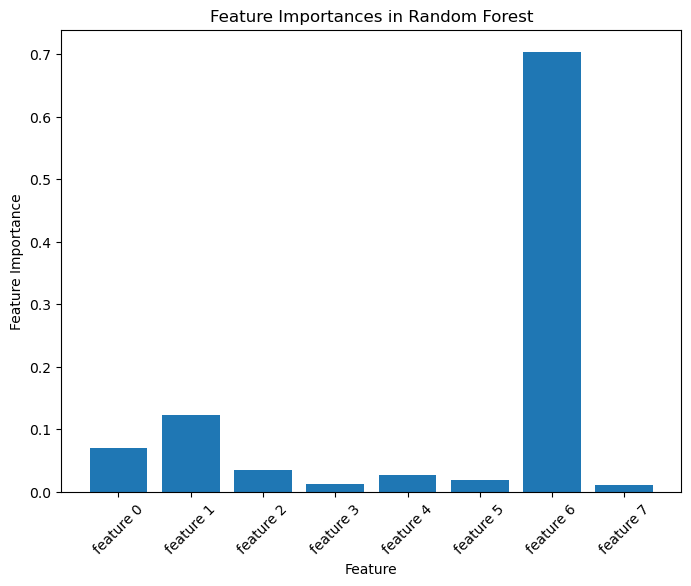

In [14]:
RF_feature_importances = rf_regressor.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), RF_feature_importances, tick_label=['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4','feature 5', 'feature 6', 'feature 7'])
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importances in Random Forest")
plt.xticks(rotation=45)
plt.show()

[0.08377439 0.06525504 0.01413357 0.02510698 0.02139304 0.00733668
 0.78062981 0.0023705 ]
[0.0639819  0.04107814 0.04426031 0.02246778 0.06232733 0.03045668
 0.7155145  0.01991336]
[0.01782928 0.16759206 0.02800974 0.00494965 0.03413986 0.0391549
 0.69422089 0.01410362]
[0.08774351 0.54462652 0.02988246 0.01917376 0.01614577 0.01243476
 0.28650901 0.00348423]


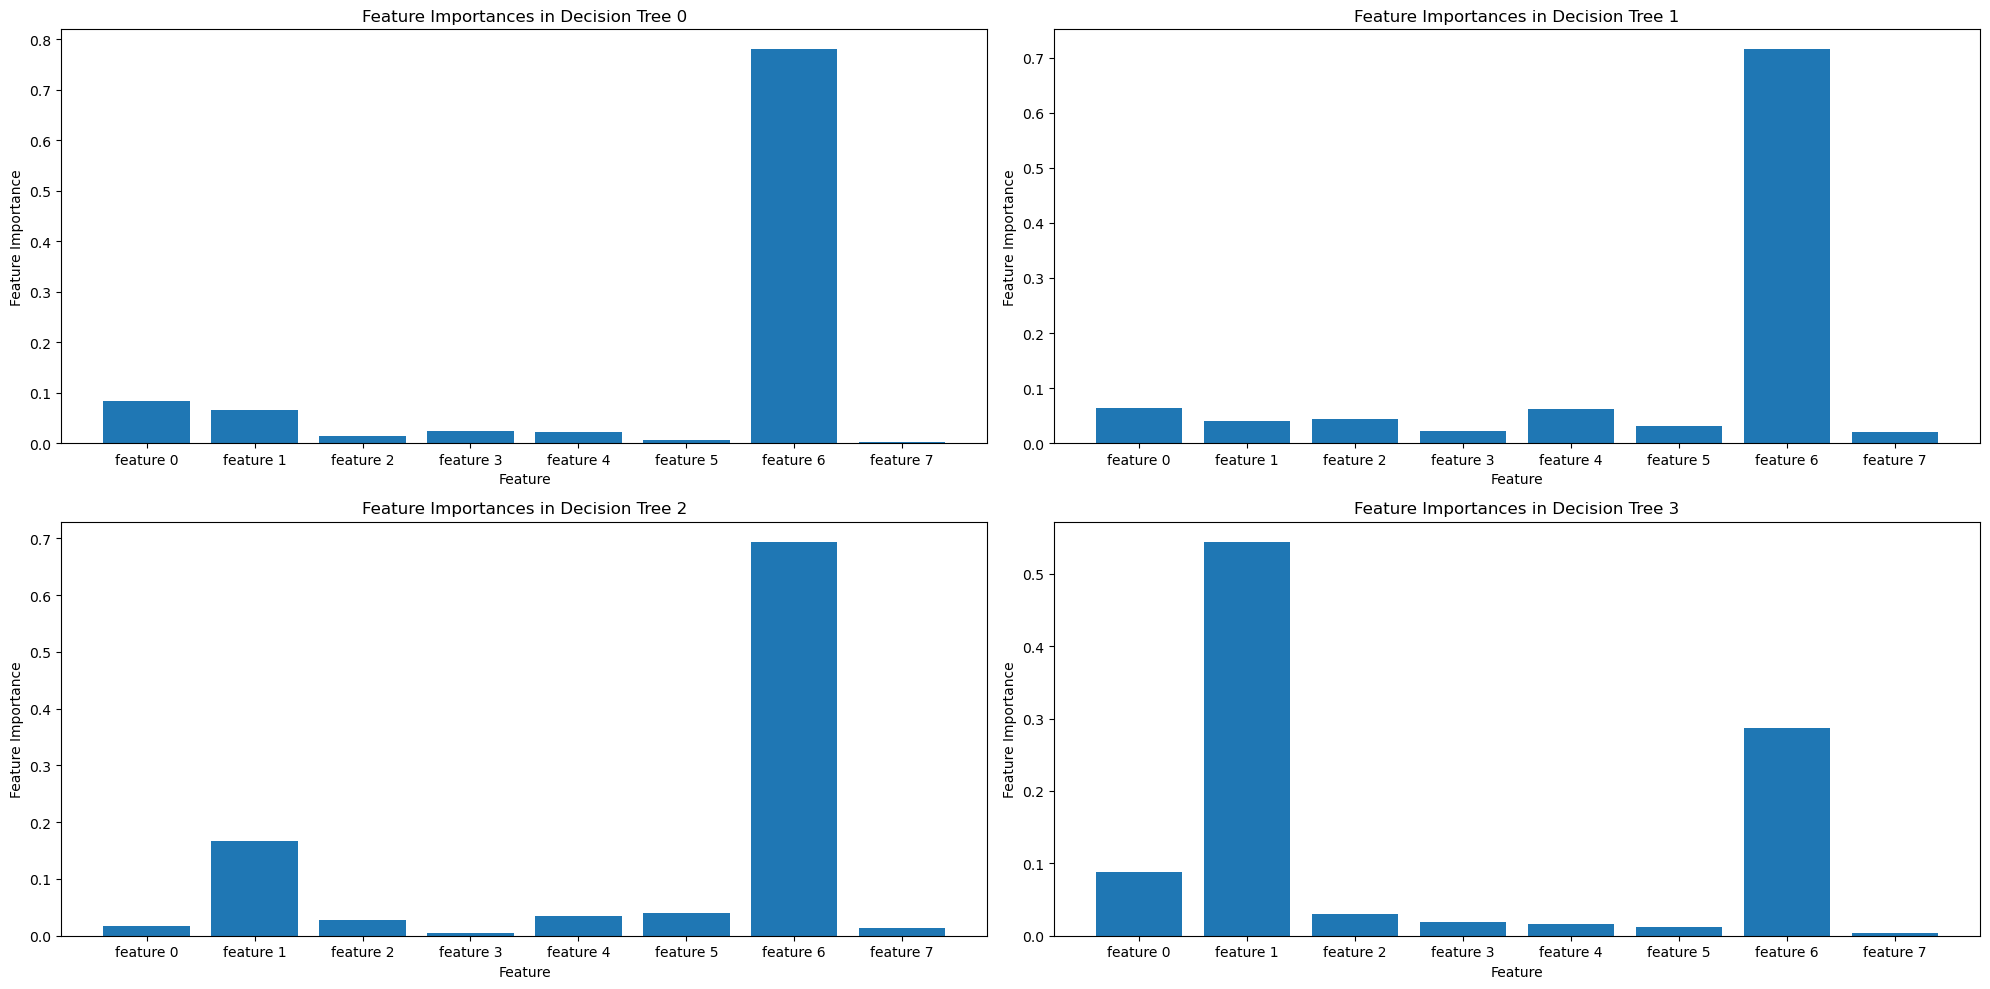

In [15]:
_, axes= plt.subplots(2,2, figsize=(20,10))
for i in range(4):
    feature_importances = rf_regressor.estimators_[i].feature_importances_
    axes[i//2, i%2].bar(range(X.shape[1]), feature_importances, tick_label=['feature 0', 'feature 1', 'feature 2', 'feature 3',  'feature 4','feature 5', 'feature 6', 'feature 7'])
    print(feature_importances)
    axes[i//2, i%2].set_xlabel("Feature")
    axes[i//2, i%2].set_ylabel("Feature Importance")
    axes[i//2, i%2].set_title(f"Feature Importances in Decision Tree {i}")
plt.tight_layout()

In [16]:
############
import numpy as np
all_importances= np.array([
[0.08377439, 0.06525504, 0.01413357 ,0.02510698, 0.02139304 ,0.00733668 ,0.78062981, 0.0023705 ],
[0.0639819  ,0.04107814 ,0.04426031 ,0.02246778 ,0.06232733 ,0.03045668 ,0.7155145  ,0.01991336],
[0.01782928 ,0.16759206 ,0.02800974 ,0.00494965 ,0.03413986 ,0.0391549 ,0.69422089 ,0.01410362],
[0.08774351 ,0.54462652 ,0.02988246 ,0.01917376 ,0.01614577 ,0.01243476 ,0.28650901 ,0.00348423]
])
all_importances.mean(axis= 0)

array([0.06333227, 0.20463794, 0.02907152, 0.01792454, 0.0335015 ,
       0.02234575, 0.61921855, 0.00996793])

In [17]:
RF_feature_importances

array([0.06999869, 0.12254396, 0.03456622, 0.01244974, 0.02758227,
       0.01852594, 0.70410667, 0.01022651])

In [18]:
y_pred = rf_regressor.predict(X_test)

# Evaluating using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)
print("Random Forest Regressor Model Evaluation:")
print("------------------------------------------\n")
print(f"{'Mean Absolute Error:': <30}", mae)
print("------------------------------------------\n")
print(f"{'Mean Squared Error:': <30} ", mse)
print("------------------------------------------\n")
print(f"{'Root Mean Squared Error: ': <30} ", rmse)
print("------------------------------------------\n")
print(f"{'r2 score: ': <30}", r2)

Random Forest Regressor Model Evaluation:
------------------------------------------

Mean Absolute Error:           0.043363750000000034
------------------------------------------

Mean Squared Error:             0.003759804875000004
------------------------------------------

Root Mean Squared Error:        0.06131724777744027
------------------------------------------

r2 score:                      0.8544029527529277


In [19]:
k = 5
scores = cross_val_score(rf_regressor, X, y, cv=k, scoring='r2')

C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

In [20]:
for fold, score in enumerate(scores, 1):
    print(f"Fold {fold}: R-squared Score: {score :.2f}")

Fold 1: R-squared Score: 0.63
Fold 2: R-squared Score: 0.79
Fold 3: R-squared Score: 0.81
Fold 4: R-squared Score: 0.81
Fold 5: R-squared Score: 0.78


In [21]:
mean_score = scores.mean()
std_score = scores.std()

In [22]:

print(f"\nMean R-squared Score: {mean_score:.2f}")
print("------------------------------------------")
print(f"Standard Deviation of R-squared Scores: {std_score:.2f}")


Mean R-squared Score: 0.77
------------------------------------------
Standard Deviation of R-squared Scores: 0.07


In [23]:
param_grid = {
    'n_estimators': [10, 50, 100], 
    #'max_features': ['square', 'log'], 
    'max_features': [int(np.sqrt(X.shape[1])), int(np.log(X.shape[1]))],
     'min_samples_split':[5,3,7]
}

In [24]:
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='r2')


In [25]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Random Forest Regressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)

# Fit the model with the best hyperparameters to the training data
best_rf_regressor.fit(X_train, y_train)

C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Dina\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

RandomForestRegressor(max_features=2, min_samples_split=3, random_state=42)

In [26]:
# Make predictions on the testing data
y_pred = best_rf_regressor.predict(X_test)

In [27]:
predictions = best_rf_regressor.predict(X_test)
r2 = best_rf_regressor.score(X_test, y_test)
print(f"Best R-squared Score on Test Set: {r2}")
print(f"Best Hyperparameters: {best_params}")

Best R-squared Score on Test Set: 0.8389176635818604
Best Hyperparameters: {'max_features': 2, 'min_samples_split': 3, 'n_estimators': 100}


In [28]:
# Evaluating using various metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)
print("BEST Random Forest Regressor Model Evaluation:")
print("------------------------------------------\n")
print(f"Mean Absolute Error: {mae:.2f}")
print("------------------------------------------\n")
print(f"Mean Squared Error: {mse:.2f}")
print("------------------------------------------\n")
print(f"Root Mean Squared Error: {rmse:.2f}")
print("------------------------------------------\n")
print(f"r2 score: {r2:.2f}")

BEST Random Forest Regressor Model Evaluation:
------------------------------------------

Mean Absolute Error: 0.04
------------------------------------------

Mean Squared Error: 0.00
------------------------------------------

Root Mean Squared Error: 0.06
------------------------------------------

r2 score: 0.84


In [31]:
best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_features': 2, 'min_samples_split': 3, 'n_estimators': 100}
